# Homework 1: Python intro and simple statistics

## Due Tuesday, May 22, start of class

### Python/Numpy

Computing the mean, standard deviation, and sampling from a Normal distribution.

mu: 0
my mean: -0.00304804626545
numpy mean: -0.00304804626545

sigma: 2
standard deviation: 2.0012269677268084
numpy standard deviation: 2.00122696773


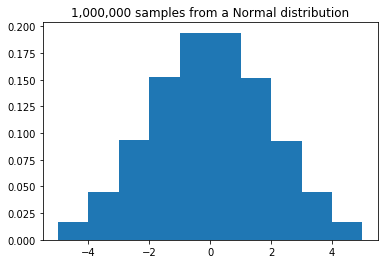

In [81]:
import math
import numpy as np
import scipy as sc
from scipy.stats import norm
import matplotlib.pyplot as plt

def mean(values):
    mean = 0
    for value in values:
        mean += value
    return mean / len(values)


def standard_deviation(values):
    m = mean(values)
    std = 0
    for value in values:
        std += (value - m) ** 2
    std = std / len(values)
    return math.sqrt(std)

mu = 0
sigma = 2
samples = norm.rvs(loc=mu, scale=sigma, size=1000000)
print("mu:", mu)
print("my mean:", mean(samples))
print("numpy mean:", np.mean(samples))
print()
print("sigma:", sigma)
print("standard deviation:", standard_deviation(samples))
print("numpy standard deviation:", np.std(samples))

bins=sc.arange(11) - 5
plt.hist(samples, bins=bins, density=True)
plt.title("1,000,000 samples from a Normal distribution")
plt.show()

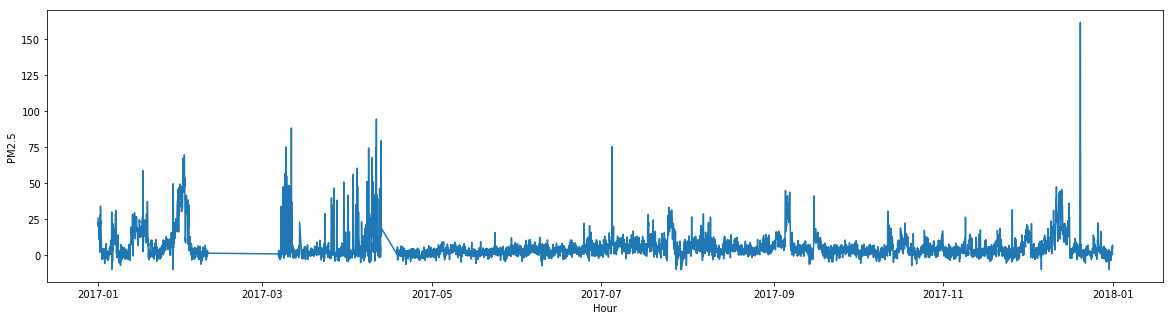

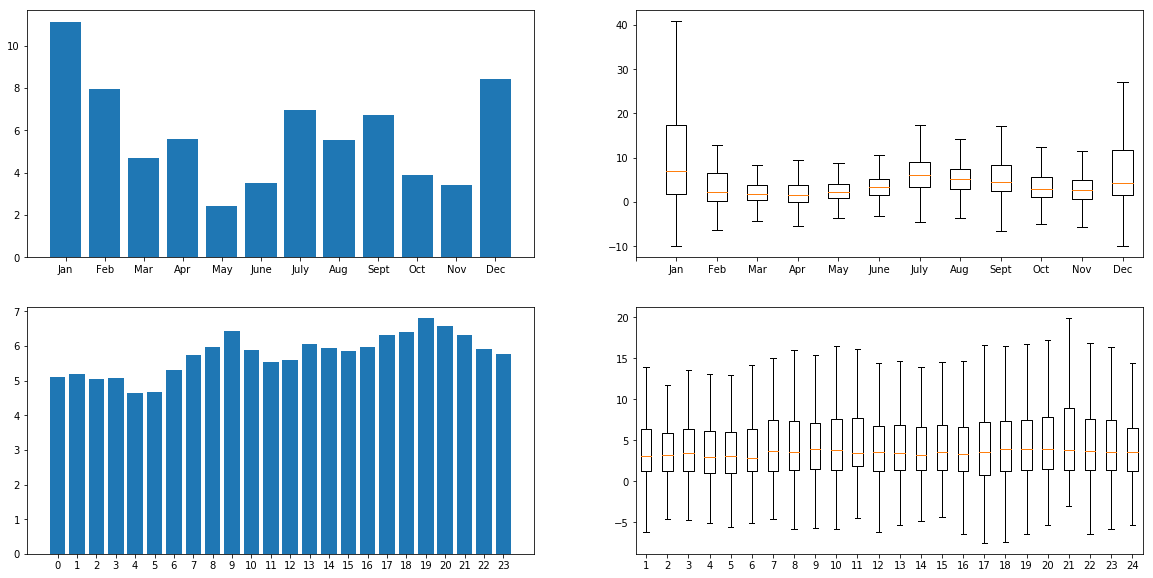

In [76]:
import pandas as pd
import warnings
from matplotlib import ticker
warnings.filterwarnings('ignore')

station = 'H3'
data = pd.read_csv("2017-PM2.5.csv", sep=",")
data = data[['Unnamed: 0', station]].copy()
data = data.rename(columns={'Unnamed: 0' : 'Date'})
data = data.drop(data.index[[0, 1]])
data['Date'] = pd.to_datetime(data['Date'])
data[station] = data[station].astype(float)
data = data.set_index('Date')
data = data.dropna()

%matplotlib inline

# Each hourly point for the Hurricane station in 2017
all_data_fig = plt.figure(figsize=(20, 5))
plot = all_data_fig.add_subplot(1,1,1)
plot.set_xlabel("Hour")
plot.set_ylabel("PM2.5")
plot.plot(data[station])

fig, sub_figs = plt.subplots(2, 2, figsize=(20, 10))

# Mean for each month
month_means = data.groupby(data.index.month).mean()
sub_figs[0,0].bar(list(range(12)), month_means[station])
sub_figs[0,0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"])
sub_figs[0,0].set_xticks(list(range(12)))

# Mean for each hour of the day
hour_means = data.groupby(data.index.hour).mean()
sub_figs[1,0].bar(list(range(24)), hour_means[station])
sub_figs[1,0].set_xticks(list(range(24)))

# Boxplot for each month
month_groups = data.groupby(data.index.month)
month_lists = []
for group in month_groups:
    month_lists.append(group[1][station])
sub_figs[0,1].boxplot(month_lists, showfliers=False)
sub_figs[0,1].set_xticklabels(["", "Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"])
sub_figs[0,1].set_xticks(list(range(13)));

# Boxplot for each hour
hour_groups = data.groupby(data.index.hour)
hour_lists = []
for group in hour_groups:
    hour_lists.append(group[1][station])
sub_figs[1,1].boxplot(hour_lists, showfliers=False);